## Data Understanding

In [1]:
## import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
## Load the Lead Scoring dataset
leads = pd.read_csv(r'C:\Users\Jitendra\Downloads\Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# check the number of rows and columns of the dataset
leads.shape

(9240, 37)

In [6]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning


#### 1. Replacing missing values

In [9]:
##### Many of the categorical variables have a level called 'Select' which is treated as Null value and will need to be replaced with NaN
leads.replace('Select', np.nan, inplace=True)

In [10]:
# Check the number of missing values in each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# Check the percentage of missing values in each column
round(leads.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# Check columns with missing values >= 45%
leads.loc[:, round(leads.isnull().mean()*100,2)<45].count()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                      9240
Lead Source                                      9204
Do Not Email                                     9240
Do Not Call                                      9240
Converted                                        9240
TotalVisits                                      9103
Total Time Spent on Website                      9240
Page Views Per Visit                             9103
Last Activity                                    9137
Country                                          6779
Specialization                                   5860
What is your current occupation                  6550
What matters most to you in choosing a course    6531
Search                                           9240
Magazine                                         9240
Newspaper Article                                9240
X Education Forums          

In [13]:
# Drop columns with missing values >= 45%
leads = leads.loc[:, round(leads.isnull().mean()*100,2)<45]

In [14]:
leads.shape

(9240, 30)

In [15]:
# Check the percentage of missing values again in each column
round(leads.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### 2. Imputing Missing Values and EDA

##### 2a. Country

In [16]:
leads.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [17]:
round(leads.Country.isnull().mean()*100,2)

26.63

In [18]:
# Checking the mode of Country column
leads.Country.mode()[0]

'India'

In [19]:
# Imputing missing values with mode of the column
leads.Country.replace(np.nan, leads.Country.mode()[0], inplace=True)

In [20]:
# Check missing values again
round(leads.Country.isnull().mean()*100,2)

0.0

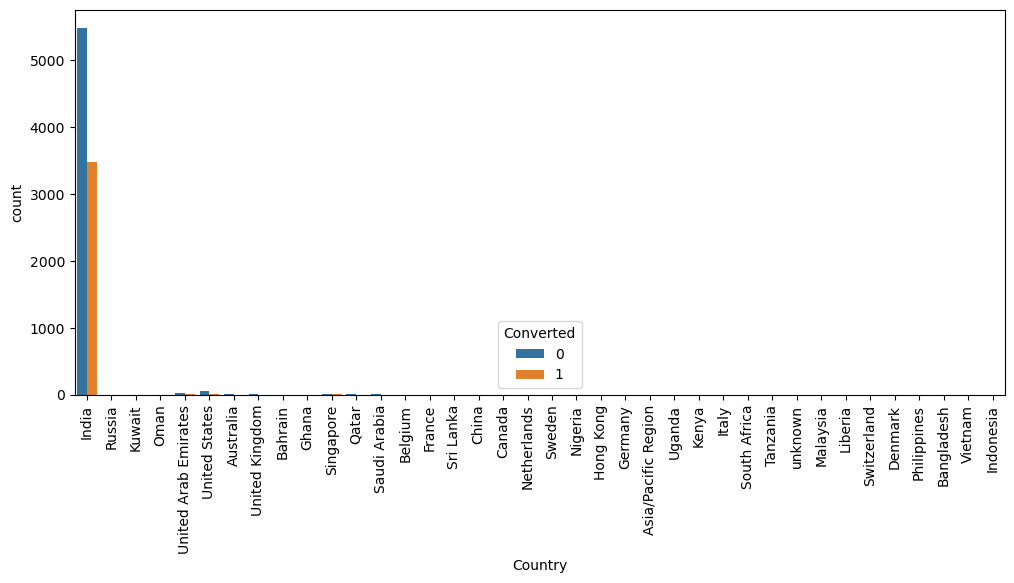

In [21]:
# EDA of Country column with target variable Converted

plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='Country', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [22]:
leads.Country.replace(['Russia', 'Kuwait', 'Oman', 'Bahrain',
                    'Ghana', 'Belgium', 'France',
                    'Sri Lanka', 'China',
                    'Canada', 'Netherlands',
                    'Sweden', 'Nigeria', 'Hong Kong',
                    'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
                    'Italy','South Africa','Tanzania',
                    'unknown', 'Malaysia', 'Liberia',
                    'Switzerland','Denmark','Philipines',
                    'Bangladesh', 'Vietnam' ,'Indonesia',
                    'Singapore','Qatar','Saudi Arabia'], 'Others', inplace=True)

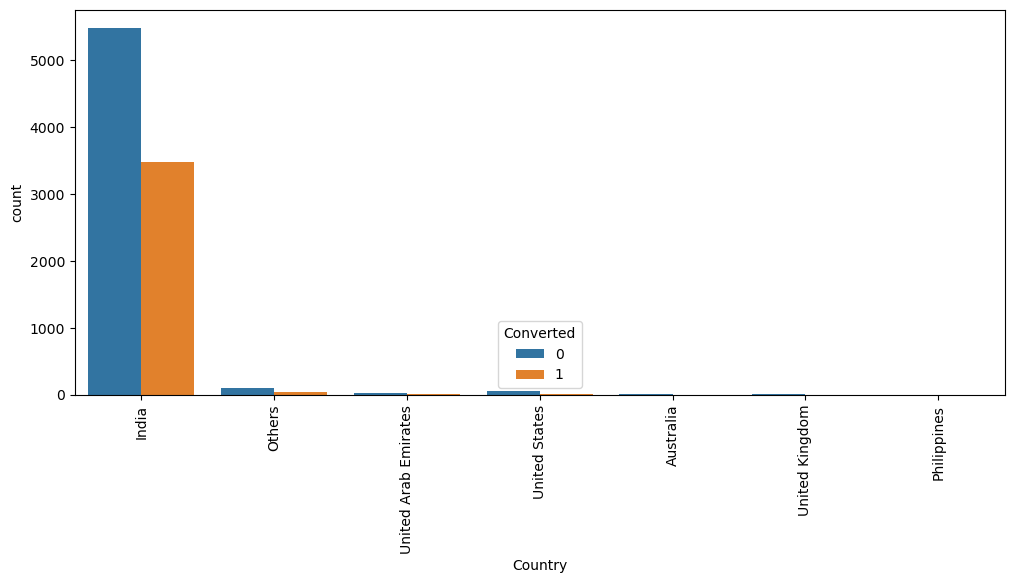

In [23]:
# countplot of Country column again
plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='Country', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [24]:
leads.Country.replace(['Australia','Philippines','United Kingdom'], 'Others', inplace=True)

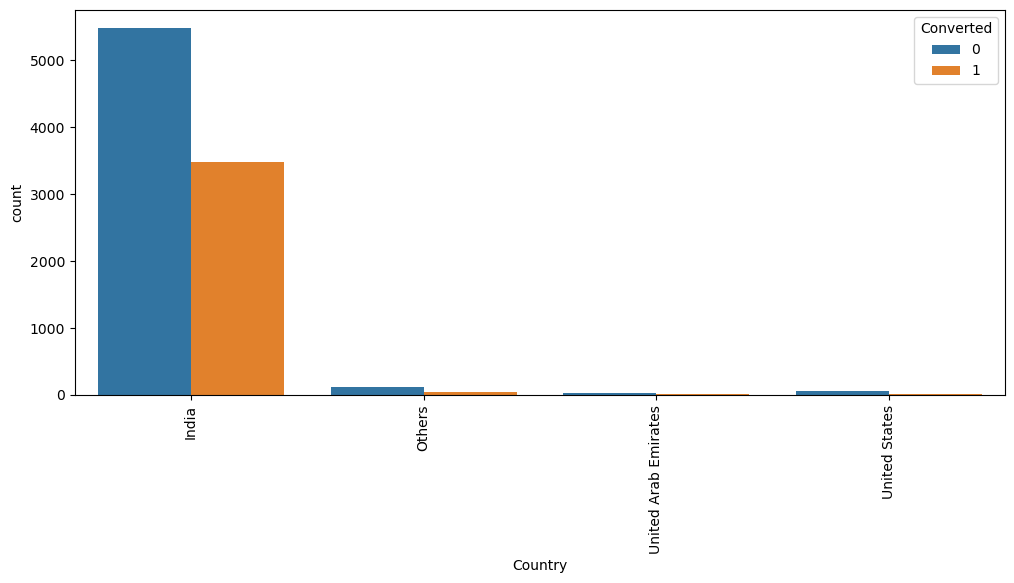

In [25]:
# countplot of Country column again
plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='Country', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

#### India generates highest no. of leads than any other country with good conversion ratio

##### 2b. City

In [26]:
leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [27]:
# Checking the mode of City column
leads.City.mode()[0]

'Mumbai'

In [28]:
# Imputing missing values with mode in column City
leads.City.replace(np.nan, leads.City.mode()[0], inplace=True)

In [29]:
leads.City.describe()

count       9240
unique         6
top       Mumbai
freq        6891
Name: City, dtype: object

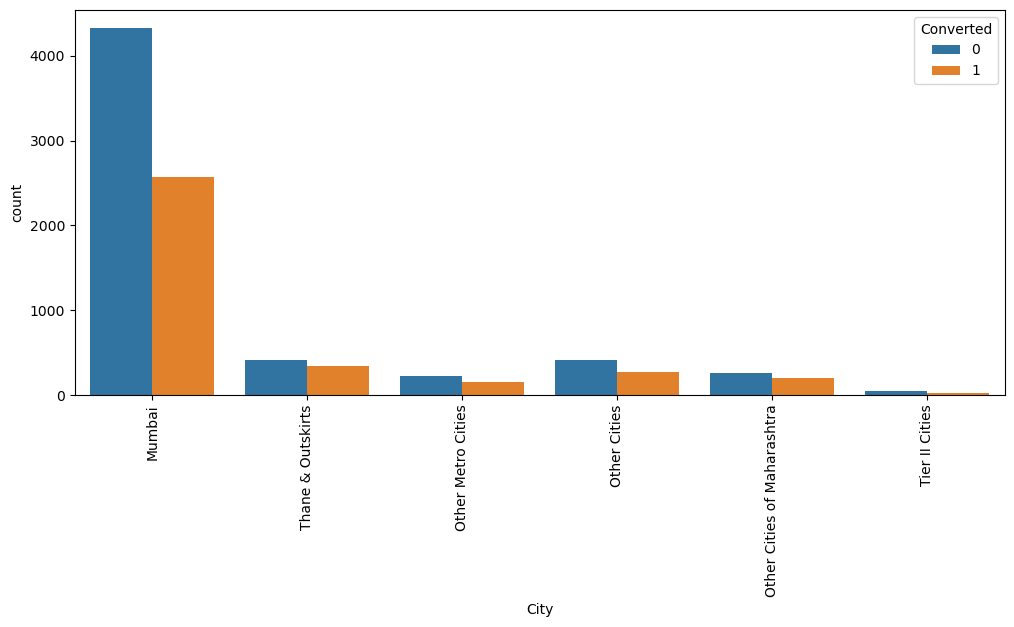

In [30]:
# EDA of City column with target variable Converted
plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='City', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

#### Mumbai generates highest no. of leads than any other city

#### 2c. What is your current occupation

In [31]:
leads['What is your current occupation'].mode()[0]

'Unemployed'

In [32]:
# Imputing missing values with mode in column 'What is your current occupation'
leads['What is your current occupation'].replace(np.nan, leads['What is your current occupation'].mode()[0], inplace=True)

In [33]:
leads['What is your current occupation'].describe()

count           9240
unique             6
top       Unemployed
freq            8290
Name: What is your current occupation, dtype: object

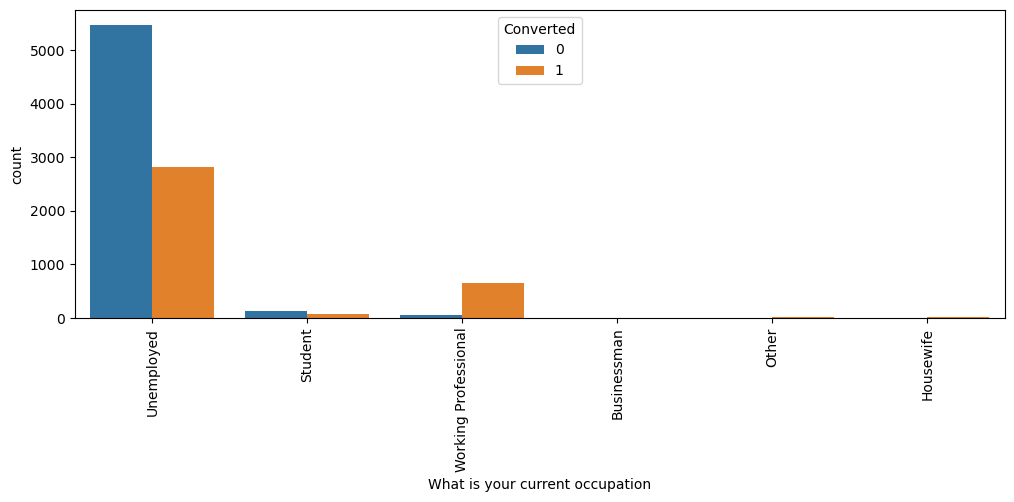

In [34]:
# EDA of 'What is your current occupation' column with target variable Converted

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='What is your current occupation', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

#### Leads for unemployed category are higher however the conversion rate is higher for Working Professionals category

#### 2d. What matters most to you in choosing a course

In [35]:
leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [36]:
# Imputing missing values with mode in column 'What matters most to you in choosing a course'

leads['What matters most to you in choosing a course'].replace(np.nan, leads['What matters most to you in choosing a course'].mode()[0], 
                                                               inplace=True)

In [37]:
leads['What matters most to you in choosing a course'].describe()

count                        9240
unique                          3
top       Better Career Prospects
freq                         9237
Name: What matters most to you in choosing a course, dtype: object

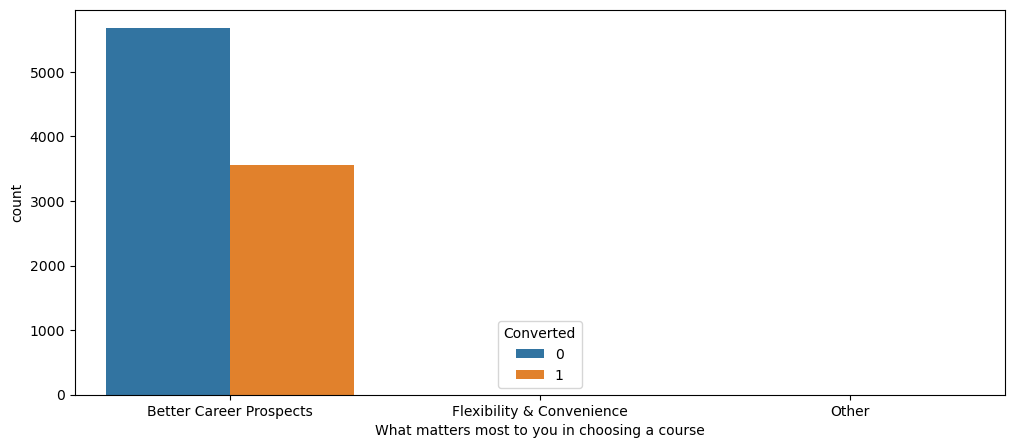

In [38]:
# EDA of 'What matters most to you in choosing a course' column with target variable Converted

plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='What matters most to you in choosing a course', hue=leads.Converted)
plt.show()

#### 2e. Specialization

In [39]:
leads['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [40]:
# Imputing missing values with 'Not Specified' in column 'Specialization'
leads.Specialization.replace(np.nan, 'Not Specified', inplace=True)

In [41]:
leads['Specialization'].describe()

count              9240
unique               19
top       Not Specified
freq               3380
Name: Specialization, dtype: object

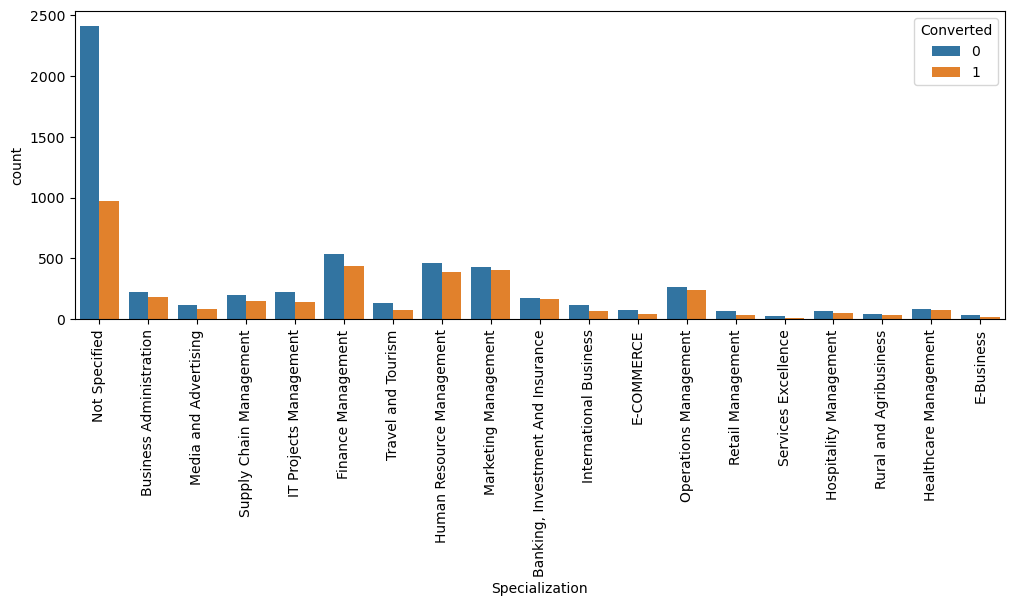

In [42]:
# Plotting countplot for Specialization column
plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Specialization', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [43]:
# Grouping different Management specializations into single specialization called 'Management' to reduce no. of categories
leads.Specialization.replace(['Supply Chain Management', 'IT Projects Management', 'Finance Management', 
                              'Human Resource Management', 'Marketing Management', 'Operations Management',
                              'Retail Management','Hospitality Management', 'Healthcare Management'], 
                              "Management", inplace= True)

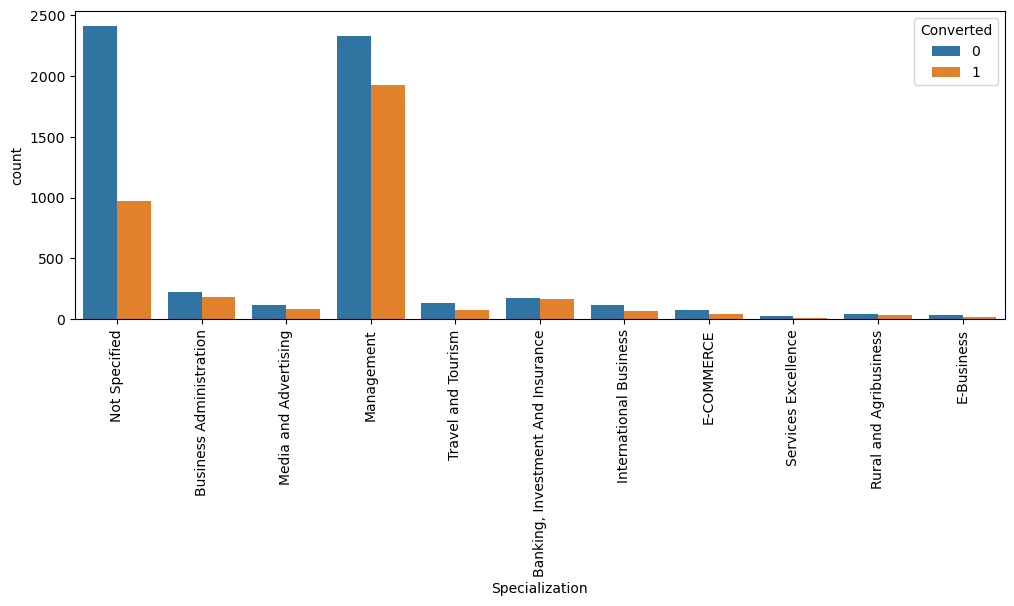

In [44]:
# Plotting countplot for Specialization column again
plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Specialization', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

#### 2f. Tags

In [45]:
leads['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [46]:
# Imputing missing values with 'Not Specified' in column 'Tags'
leads.Tags.replace(np.nan, 'Not Specified', inplace=True)

In [47]:
leads['Tags'].describe()

count              9240
unique               27
top       Not Specified
freq               3353
Name: Tags, dtype: object

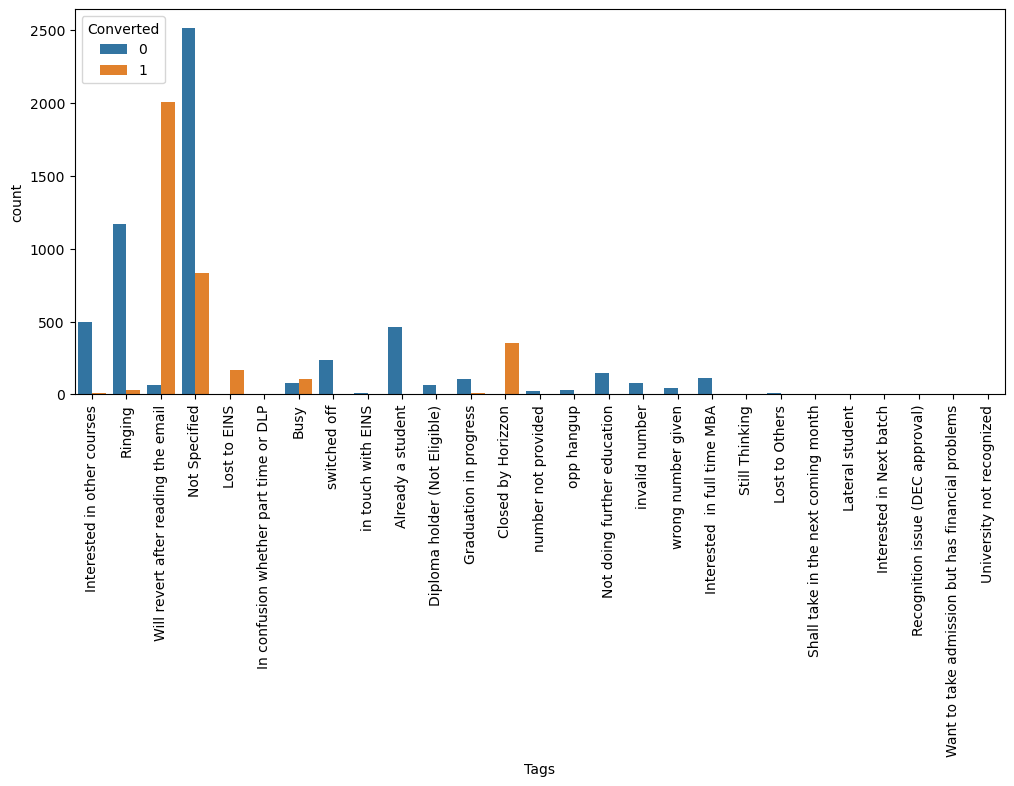

In [48]:
# Plotting a countplot for Tags column
plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='Tags', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [49]:
# Replacing low frequency Tag values with "Other_Tags" to reduce no. of categories
leads.Tags.replace(['invalid number', 'wrong number given', 'Interested  in full time MBA', 'Still Thinking',
                    'Lost to Others', 'Shall take in the next coming month', 'Lateral student',
                    'Interested in Next batch', 'Recognition issue (DEC approval)',
                    'Want to take admission but has financial problems', 
                    'Not doing further education', 'Graduation in progress', 'Diploma holder (Not Eligible)',
                    'opp hangup', 'number not provided', 'in touch with EINS', 'In confusion whether part time or DLP',
                    'University not recognized','switched off','Already a student'], 'Other_Tags', inplace=True)

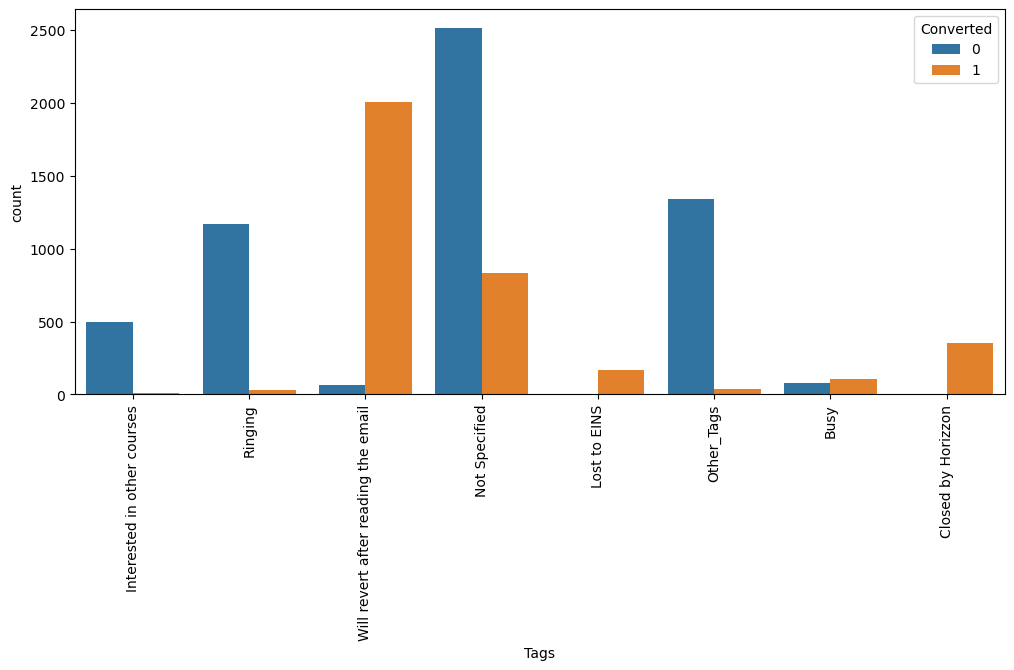

In [50]:
# Plotting a countplot for Tags column again
plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='Tags', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [51]:
# Checking again for missing values column wise
round(leads.isnull().mean()*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

#### There are some columns seen with less than 2% missing values

#### Lead Source

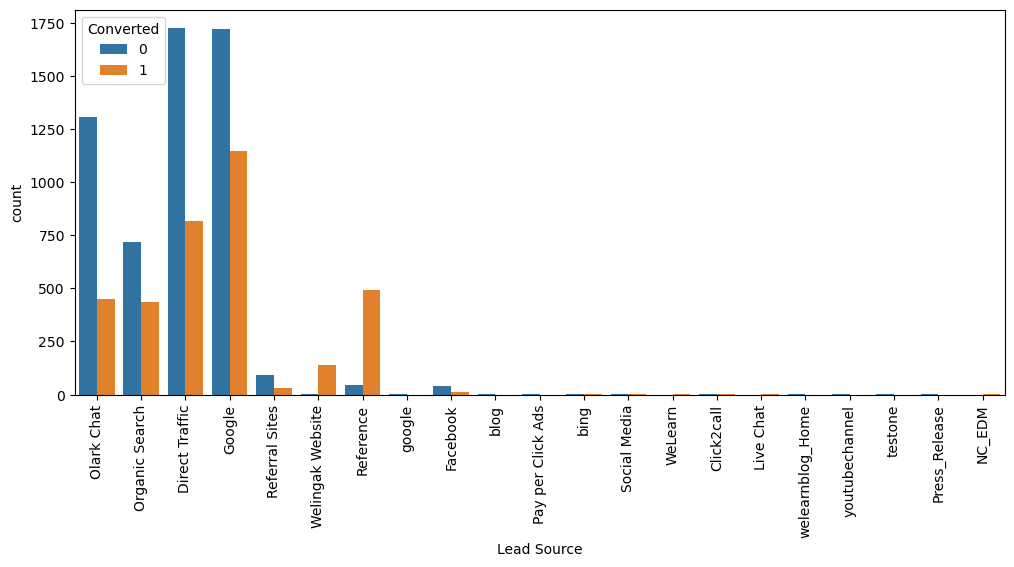

In [52]:
# countplot for Lead Source column
plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='Lead Source', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [53]:
# Replacing 'google' with 'Google' and 'Facebook' with 'Social Media'
# Imputing low frequency levels and missing values with "others"
leads['Lead Source'].replace('Facebook', 'Social Media', inplace=True)
leads['Lead Source'].replace('google', 'Google', inplace=True)
leads['Lead Source'].replace(np.nan, 'Others', inplace=True)
leads['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'youtubechannel', 'testone', 
                              'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'],
                              'Others', inplace=True)

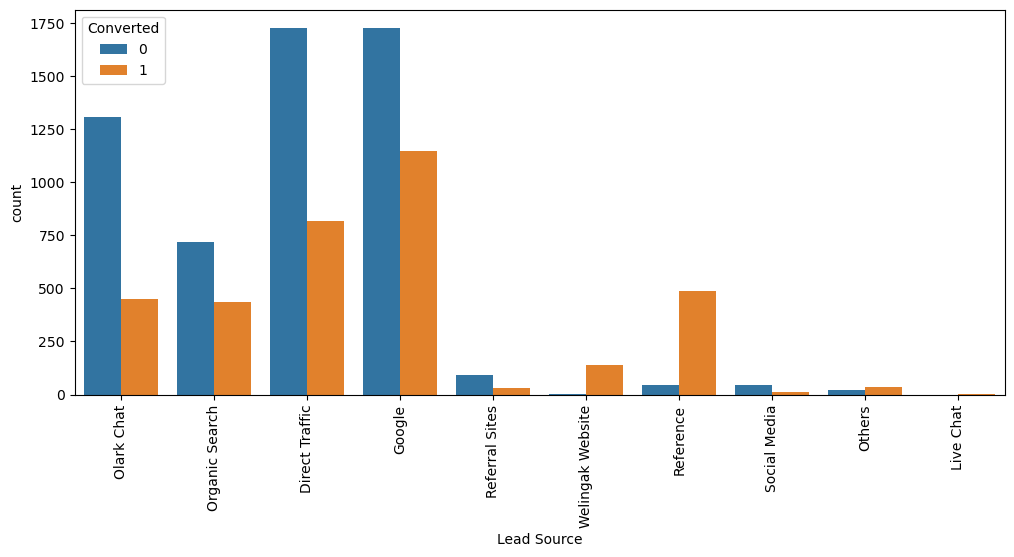

In [54]:
# countplot for 'Lead Source' column
plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='Lead Source', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

#### Leads from "Reference" has high conversion rate
#### Conversion rate has to be improved for leads from "Direct Traffic","Google", "Olark Chat" and "Organic Search" 
#### Also amount of leads generated through "Reference" needs to increase

### Last Activity

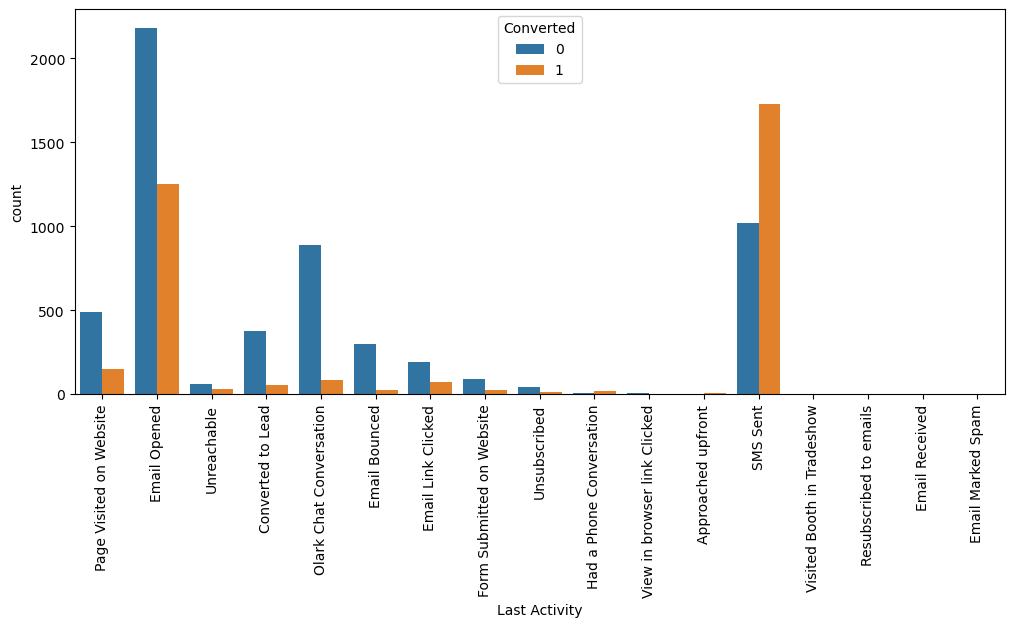

In [55]:
# Countplot for Last Activity column
plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='Last Activity' , hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [56]:
# Imputing missing values and low frequency values with 'Others'
leads['Last Activity'].replace(np.nan, 'Others', inplace=True)
leads['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 
                                'Approached upfront', 'Visited Booth in Tradeshow',
                                'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Others', inplace=True)

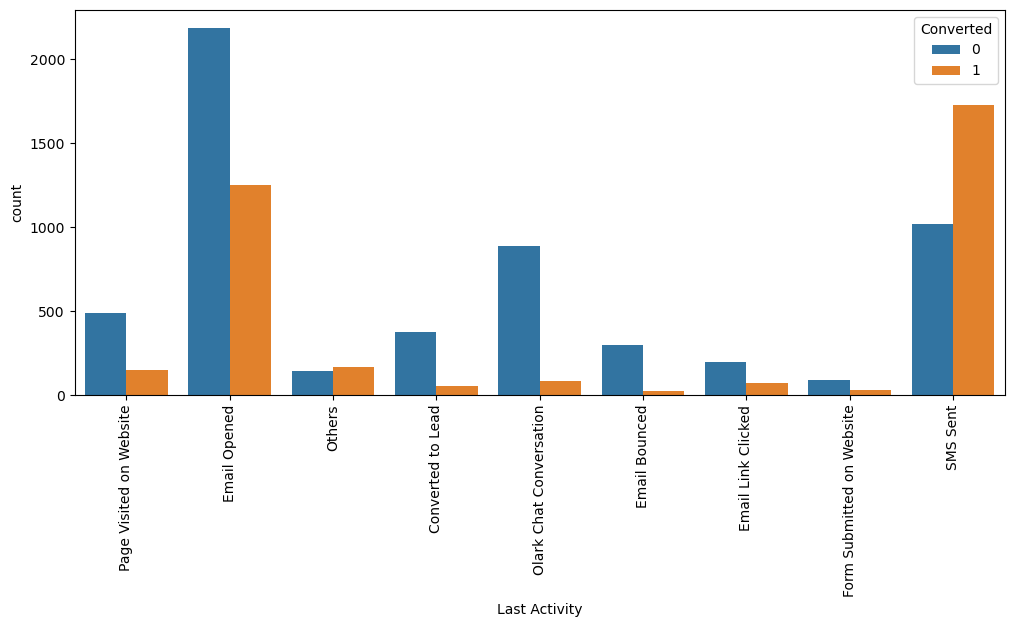

In [57]:
# Countplot for Last Activity column again
plt.figure(figsize=[12,5])
sns.countplot(data=leads, x='Last Activity' , hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [58]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [59]:
#dropping columns 'Update me on Supply Chain Content','Get updates on DM Content' as all their values are No
leads.drop(['Update me on Supply Chain Content','Get updates on DM Content'], axis = 1, inplace = True)

In [60]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [61]:
#dropping other columns as all their values are No
leads.drop(['Receive More Updates About Our Courses','Newspaper','Do Not Call',
            'I agree to pay the amount through cheque','Newspaper Article','Magazine',
            'X Education Forums','Digital Advertisement','Through Recommendations',
            'Do Not Email','Search'], axis = 1, inplace = True)

In [62]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [63]:
### Check for missing values in columns
round(leads.isnull().mean()*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Tags                                             0.00
City                                             0.00
A free copy of Mastering The Interview           0.00
Last Notable Activity                            0.00
dtype: float64

In [64]:
# Imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%) and variation in data is low.
leads[['Page Views Per Visit']]=leads[['Page Views Per Visit']].fillna(value=leads[['Page Views Per Visit']].mean())
leads[['TotalVisits']]=leads[['TotalVisits']].fillna(value=leads[['TotalVisits']].mean())

In [65]:
### Check for missing values in columns again
round(leads.isnull().mean()*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

#### There are no more missing values in any of the dataframe columns

In [66]:
#Dropping columns 'Prospect ID', 'Lead Number' as they are not useful for any analysis
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [67]:
leads.shape

(9240, 15)

In [68]:
# value count of column "Last Notable Activity"
leads['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

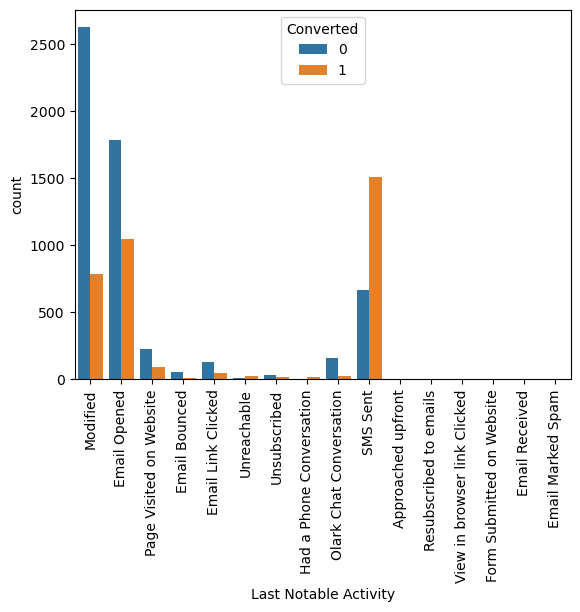

In [69]:
# plot of column "Last Notable Activity"
sns.countplot(data=leads, x='Last Notable Activity', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [70]:
# Replacing low frequency values with 'Other_Activities' in column 'Last Notable Activity'
leads['Last Notable Activity'].replace(['Email Bounced', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 
                                        'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked',
                                        'Form Submitted on Website', 'Email Received',
                                        'Email Marked Spam'], 'Others', inplace=True)

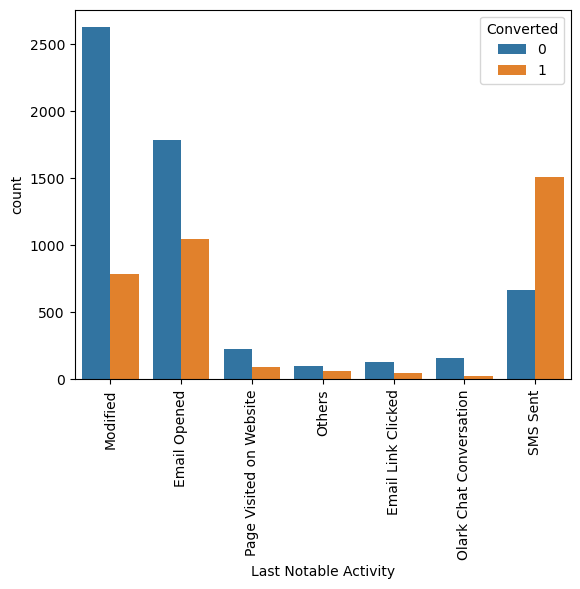

In [71]:
# plot of column "Last Notable Activity" again
sns.countplot(data=leads, x='Last Notable Activity', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

#### "SMS Sent" category in the Last Notable Activity column has the highest lead conversion rate, therefore the generation of leads should be more from this category.

### Imbalanced Column to be dropped

In [72]:
# Country column since more than 90% of their data comes from one value which make it imbalanced column
leads.drop(['Country'], axis=1, inplace=True)

In [73]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Converted                                      9240 non-null   int64  
 3   TotalVisits                                    9240 non-null   float64
 4   Total Time Spent on Website                    9240 non-null   int64  
 5   Page Views Per Visit                           9240 non-null   float64
 6   Last Activity                                  9240 non-null   object 
 7   Specialization                                 9240 non-null   object 
 8   What is your current occupation                9240 non-null   object 
 9   What matters most to you in choosing a course  9240 

In [74]:
leads['What matters most to you in choosing a course'].describe()

count                        9240
unique                          3
top       Better Career Prospects
freq                         9237
Name: What matters most to you in choosing a course, dtype: object

In [75]:
leads.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

## Univariate Analysis of Numerical Columns

0    0.61461
1    0.38539
Name: Converted, dtype: float64


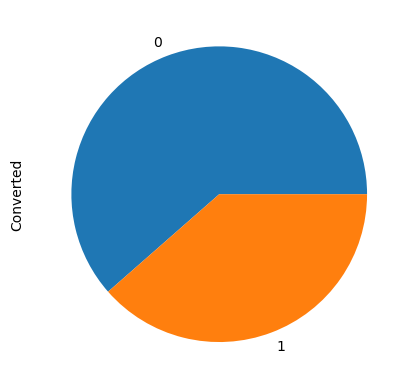

In [76]:
#### 1. Target Variable 'Converted'
print(leads.Converted.value_counts(normalize=True))

leads['Converted'].value_counts(normalize=True).plot.pie()
plt.show()

#### Conversion rate of 38.5% is low and needs to be improved as per the stated objective of this study

### Total Visits

#### Check for outliers using boxplot

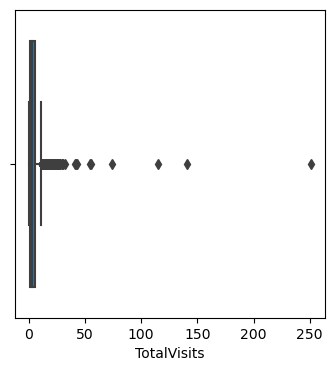

In [77]:
plt.figure(figsize=[4,4])
sns.boxplot(leads.TotalVisits)
plt.show()

#### There are outliers seen which need to be treated

In [78]:
##Check the percentile values
leads.TotalVisits.describe(percentiles=[0.01, 0.05, .25, .50, .75, .90, .99])

count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [79]:
#Removing 1% outliers from the top and bottom 
q1 = leads.TotalVisits.quantile(.01)
q3 = leads.TotalVisits.quantile(.99)
leads = leads[(leads.TotalVisits>=q1) & (leads.TotalVisits<=q3)]

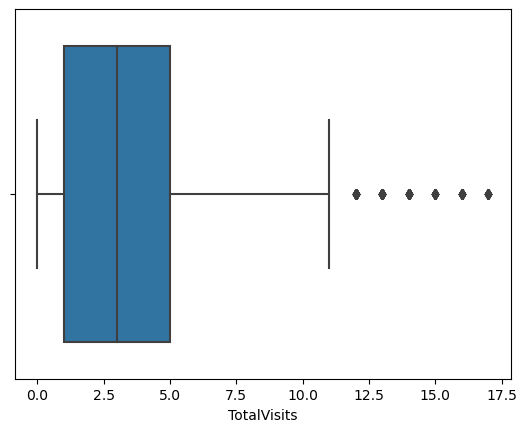

In [80]:
# boxplot
sns.boxplot(leads.TotalVisits)
plt.show()

### Total Time Spent on Website

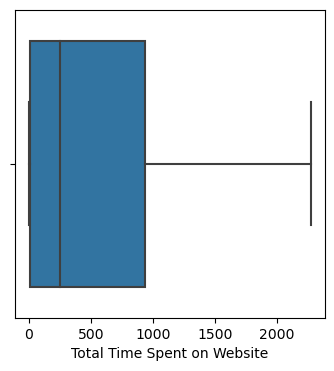

In [81]:
plt.figure(figsize=[4,4])
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

In [82]:
#percentile values
leads['Total Time Spent on Website'].describe(percentiles=[0.05, .25, .50, .75, .90, .99])

count    9157.000000
mean      486.189036
std       547.695908
min         0.000000
5%          0.000000
25%        10.000000
50%       247.000000
75%       933.000000
90%      1379.000000
99%      1839.440000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

#### There are No outliers seen here

### Page Views Per Visit

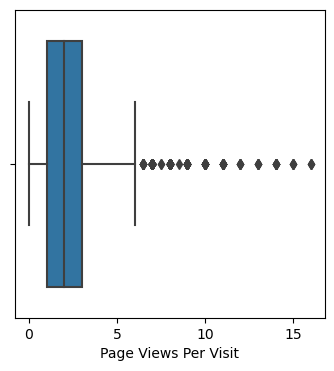

In [83]:
plt.figure(figsize=[4,4])
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [84]:
#Removing 1% outliers from the top and bottom 
q1 = leads['Page Views Per Visit'].quantile(.01)
q3 = leads['Page Views Per Visit'].quantile(.99)
leads = leads[(leads['Page Views Per Visit']>=q1) & (leads['Page Views Per Visit']<=q3)]

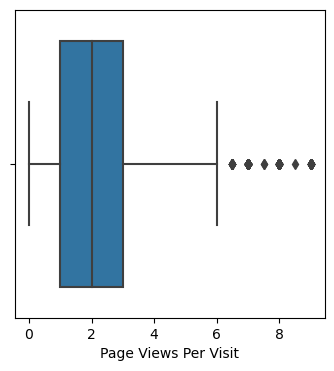

In [85]:
plt.figure(figsize=[4,4])
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [86]:
#percentile values
leads['Page Views Per Visit'].describe(percentiles=[0.05, .25, .50, .75, .90, .99])

count    9090.000000
mean        2.268304
std         1.880919
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         8.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

In [87]:
leads.shape

(9090, 13)

# Bivariate Numeric Analysis

### Total Visits vs Converted

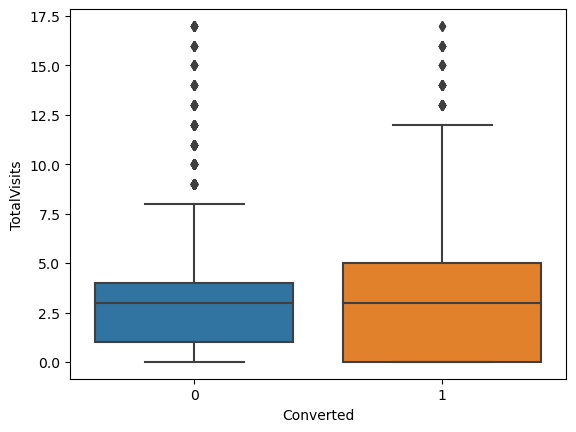

In [88]:
sns.boxplot(x='Converted', y='TotalVisits', data=leads)
plt.show()

#### Median value for both are identical so not much inference here

### Total Time Spent on Website vs Converted

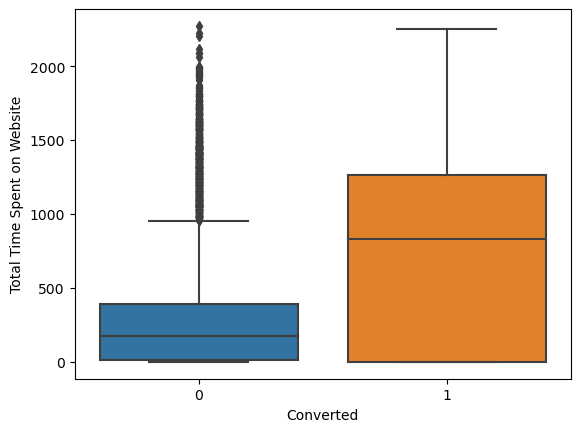

In [89]:
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads)
plt.show()

#### 1. The leads spending more time on website are more likely to get converted
#### 2. The website should be improved to increase the conversion rate

### Page Views Per Visit vs Converted

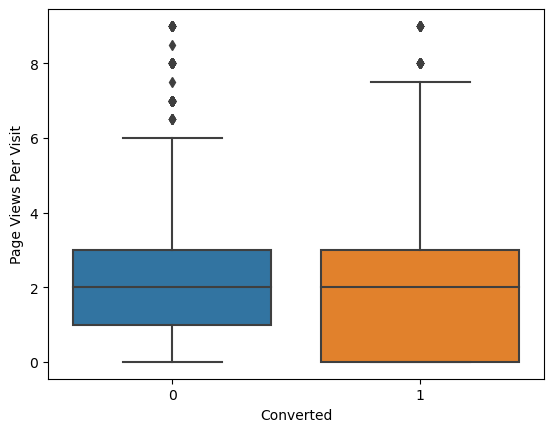

In [90]:
sns.boxplot(x='Converted', y='Page Views Per Visit', data=leads)
plt.show()

#### Median value for both are identical so not much inference here

# MultiVariate Analysis

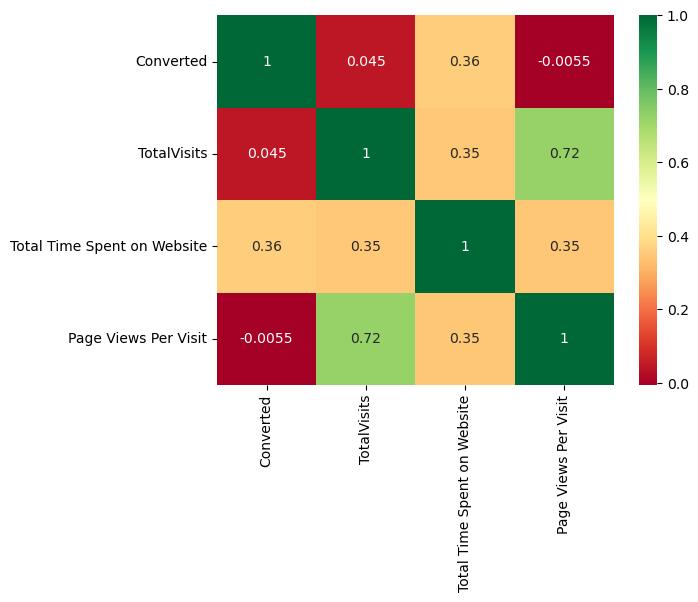

In [91]:
#correlation heatmap
sns.heatmap(leads.corr(), cmap='RdYlGn', annot=True)
plt.show()

#### 1. Total visits and Page views per visit have a high correlation (0.72)
#### 2. Target variable 'Converted' and feature variable 'Total time spent on website' show some positive correlation

# Data Preparation

In [92]:
#Converting some binary variables (Yes/No) to 0/1
#List of variables to map
varlist = ['A free copy of Mastering The Interview']

#Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

#Applying the function to the varlist
leads[varlist] = leads[varlist].apply(binary_map)

In [93]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [94]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   object 
 1   Lead Source                             9090 non-null   object 
 2   Converted                               9090 non-null   int64  
 3   TotalVisits                             9090 non-null   float64
 4   Total Time Spent on Website             9090 non-null   int64  
 5   Page Views Per Visit                    9090 non-null   float64
 6   Last Activity                           9090 non-null   object 
 7   Specialization                          9090 non-null   object 
 8   What is your current occupation         9090 non-null   object 
 9   Tags                                    9090 non-null   object 
 10  City                                    9090 non-null   obje

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [95]:
# Creating a dummy variable for some of the categorical variables and dropping the first one
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation', 'City']], drop_first=True)
leads = pd.concat([leads, dummy], axis=1)

In [96]:
# creating dummy variables for other categorical variables with multiple levels

# Lead Source
ls = pd.get_dummies(leads['Lead Source'], prefix = 'Lead Source')     #creating dummies
ls.drop('Lead Source_Others', axis=1, inplace=True)  # dropping a dummy variable
leads = pd.concat([leads, ls], axis=1)       # concatenate to 'leads' dataframe

# Last Activity
la = pd.get_dummies(leads['Last Activity'], prefix = 'Last Activity')
la.drop('Last Activity_Others', axis=1, inplace=True)
leads = pd.concat([leads, la], axis=1)

# Specialization
spec = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
spec.drop('Specialization_Not Specified', axis=1, inplace=True)
leads = pd.concat([leads, spec], axis=1)

# Tags
tg = pd.get_dummies(leads['Tags'], prefix = 'Tags')
tg.drop('Tags_Not Specified', axis=1, inplace=True)
leads = pd.concat([leads, tg], axis=1)





In [97]:
# # creating dummy variables for other categorical variables with multiple levels for column Last Notable Activity
lna = pd.get_dummies(leads['Last Notable Activity'], prefix = 'Last Notable Activity')
lna.drop('Last Notable Activity_Others', axis=1, inplace=True)
leads = pd.concat([leads, lna], axis=1)

In [98]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [99]:
# dropping original variables for which dummies were created
leads.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization', 'What is your current occupation', 
            'Tags', 'City', 'Last Notable Activity'], axis=1, inplace=True )

In [100]:
print(leads.shape)
leads.head()

(9090, 59)


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


## Train-Test Split

In [101]:
#import required library
from sklearn.model_selection import train_test_split


In [102]:
# drop the Target variable for X representing all feature variables
X = leads.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [103]:
# Target variable
y = leads.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [104]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [105]:
print(X_train.shape)
print(X_test.shape)

(6363, 58)
(2727, 58)


## Feature Scaling

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,7.0,250,2.33,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6087,0.0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,5.0,470,5.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7656,6.0,352,6.00,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3241,4.0,973,1.33,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [108]:
#scaling the variables to standardise the three continuous variables
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 
                                                                    'Total Time Spent on Website', 'Page Views Per Visit']])

In [109]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,1.334426,-0.428736,0.041148,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6087,-1.097104,-0.887355,-1.209722,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,0.639703,-0.025151,1.474549,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7656,0.987065,-0.241619,2.011403,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3241,0.292342,0.897591,-0.495706,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6363 entries, 302 to 5730
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6363 non-null   float64
 1   Total Time Spent on Website                           6363 non-null   float64
 2   Page Views Per Visit                                  6363 non-null   float64
 3   A free copy of Mastering The Interview                6363 non-null   int64  
 4   Lead Origin_Landing Page Submission                   6363 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6363 non-null   uint8  
 6   Lead Origin_Lead Import                               6363 non-null   uint8  
 7   Lead Origin_Quick Add Form                            6363 non-null   uint8  
 8   What is your current occupation_Housewife             63

## Model Building

In [111]:
# Using GLM() method to fit a logistic regression model using statsmodels
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1194.6
Date:                Mon, 26 Jun 2023   Deviance:                       2389.3
Time:                        15:05:08   Pearson chi2:                 1.01e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6149
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0281      1.724      1.177      0.239      -1.350       5.406
TotalVisits                                              0.2411      0.079      3.034      0.002       0.085       0.397
Total Time Spent on Website                              1.0872      0.063     17.162      0.000       0.963       1.211
Page Views Per Visit                                    -0.1821      0.093     -1.967      0.049      -0.364      -0.001
A free copy of Mastering The Interview                  -0.2501      0.182     -1.373      0.170      -0.607       0.107
Lead Origin_Landing Page Submission                     -0.5663      0.237     -2.394      0.017      -1.030      -0.103
Lead Origin_Lead Add Form                                2.7830      1.463      1.903      0.057      -0.084       5.650
Lead Origin_Lead Import                                  1.8883      1.728      1.093      0.274      -1.498       5.275
Lead Origin_Quick Add Form                              22.3787   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
What is your current occupation_Housewife               17.6516   1.47e+04      0.001      0.999   -2.88e+04    2.88e+04
What is your current occupation_Other                   -0.5599      2.082     -0.269      0.788      -4.641       3.521
What is your current occupation_Student                 -1.7436      1.454     -1.199      0.230      -4.593       1.106
What is your current occupation_Unemployed              -2.1111      1.329     -1.588      0.112      -4.716       0.494
What is your current occupation_Working Professional    -1.3386      1.374     -0.974      0.330      -4.031       1.354
City_Other Cities                                        0.2727      0.232      1.177      0.239      -0.181       0.727
City_Other Cities of Maharashtra                         0.0405      0.259      0.157      0.876      -0.467       0.548
City_Other Metro Cities                                 -0.3096      0.339     -0.912      0.362      -0.975       0.355
City_Thane & Outskirts                               -5.714e-05      0.226     -0.000      1.000      -0.444       0.443
City_Tier II Cities                                      0.6923      0.678      1.020      0.308      -0.637       2.022
Lead Source_Direct Traffic                              -0.9231      1.041     -0.887      0.375      -2.964       1.117
Lead Source_Google                                      -0.7815      1.030     -0.759      0.448      -2.801       1.238
Lead Source_Live Chat                                   14.7522   3.41e+04      0.000      1.000   -6.68e+04    6.68e+04
Lead Source_Olark Chat                                   0

## Feature Selection using RFE

In [112]:
# importing library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [113]:
from sklearn.feature_selection import RFE
# running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True])

In [114]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('A free copy of Mastering The Interview', False, 24),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Origin_Quick Add Form', False, 19),
 ('What is your current occupation_Housewife', False, 21),
 ('What is your current occupation_Other', False, 27),
 ('What is your current occupation_Student', False, 13),
 ('What is your current occupation_Unemployed', False, 6),
 ('What is your current occupation_Working Professional', False, 32),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 42),
 ('City_Other Metro Cities', False, 17),
 ('City_Thane & Outskirts', False, 43),
 ('City_Tier II Cities', False, 18),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', False, 

In [115]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [116]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
     

### Assessing the model with StatsModels

In [117]:
# Using the features selected by RFE to to fit a logistic regression model using statsmodels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1269.4
Date:                Mon, 26 Jun 2023   Deviance:                       2538.9
Time:                        15:18:15   Pearson chi2:                 8.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6057
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3415      0.084    -16.021      0.000      -1.506      -1.177
Total Time Spent on Website                       0.8633      0.052     16.504      0.000       0.761       0.966
Lead Origin_Lead Add Form                         3.5442      1.000      3.543      0.000       1.583       5.505
Lead Source_Reference                            -2.4294      1.062     -2.288      0.022      -4.511      -0.348
Lead Source_Welingak Website                      2.3879      1.423      1.678      0.093      -0.401       5.177
Last Activity_Email Bounced                      -1.6130      0.479     -3.370      0.001      -2.551      -0.675
Last Activity_SMS Sent                            0.9834      0.223      4.403      0.000       0.546       1.421
Tags_Closed by Horizzon                           6.4331      0.737      8.734      0.000       4.989       7.877
Tags_Interested in other courses                 -2.1663      0.412     -5.262      0.000      -2.973      -1.359
Tags_Lost to EINS                                 6.2344      0.738      8.452      0.000       4.789       7.680
Tags_Other_Tags                                  -2.8083      0.228    -12.309      0.000      -3.256      -2.361
Tags_Ringing                                     -3.4659      0.234    -14.834      0.000      -3.924      -3.008
Tags_Will revert after reading the email          4.1791      0.172     24.324      0.000       3.842       4.516
Last Notable Activity_Modified                   -1.2796      0.154     -8.305      0.000      -1.582      -0.978
Last Notable Activity_Olark Chat Conversation    -1.4146      0.436     -3.241      0.001      -2.270      -0.559
Last Notable Activity_SMS Sent                    1.1646      0.258      4.505      0.000       0.658       1.671
=================================================================================================================
"""

In [118]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.152952
6087    0.006691
1033    0.203718
7656    0.053757
3241    0.996860
5738    0.113518
7366    0.002034
3680    0.040240
4170    0.996634
43      0.147295
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.152952  , 0.00669144, 0.2037183 , 0.05375688, 0.99686019,
       0.1135179 , 0.00203434, 0.04024013, 0.99663435, 0.14729486])

In [120]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.152952,302
1,0,0.006691,6087
2,0,0.203718,1033
3,0,0.053757,7656
4,1,0.996860,3241


In [121]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.152952,302,0
1,0,0.006691,6087,0
2,0,0.203718,1033,0
3,0,0.053757,7656,0
4,1,0.996860,3241,1


### Confusion Matrix

In [122]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3736  199]
 [ 275 2153]]


In [ ]:
# Predicted     not_converted    converted
# Actual
# not_converted        3736      199
# converted            275       2153  

In [123]:
# checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9255068363979255


## Checking VIFs

In [124]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
print(X_train[col].columns)
print(X_train[col].shape[1])
print(X_train[col].values)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')
15
[[-0.42873565  0.          0.         ...  0.          0.
   0.        ]
 [-0.88735486  0.          0.         ...  1.          0.
   0.        ]
 [-0.02515075  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 1.13056964  0.          0.         ...  0.          1.
   0.        ]
 [ 1.37455505  0.          0.         ...  0.          0.
   0.        ]
 [-0.83232055  0.          0.         ...  0.          0.
   0.        ]]


In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,Lead Origin_Lead Add Form,19.59
2,Lead Source_Reference,15.41
14,Last Notable Activity_SMS Sent,6.05
5,Last Activity_SMS Sent,5.92
3,Lead Source_Welingak Website,5.03
12,Last Notable Activity_Modified,1.79
11,Tags_Will revert after reading the email,1.57
6,Tags_Closed by Horizzon,1.31
0,Total Time Spent on Website,1.18
9,Tags_Other_Tags,1.18


There are a few variables with high VIF. 
It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. 
The variable 'Lead Origin_Lead Add Form' has the highest VIF so it has to be dropped.

In [132]:
# dropping variable with high VIF
col = col.drop('Lead Origin_Lead Add Form',1)
col

Index(['Total Time Spent on Website', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [133]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1276.1
Date:                Mon, 26 Jun 2023   Deviance:                       2552.1
Time:                        16:20:46   Pearson chi2:                 8.23e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6049
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3346      0.083    -15.998      0.000      -1.498      -1.171
Total Time Spent on Website                       0.8549      0.052     16.404      0.000       0.753       0.957
Lead Source_Reference                             1.0939      0.370      2.959      0.003       0.369       1.818
Lead Source_Welingak Website                      5.9104      1.021      5.791      0.000       3.910       7.911
Last Activity_Email Bounced                      -1.5675      0.481     -3.256      0.001      -2.511      -0.624
Last Activity_SMS Sent                            0.9973      0.223      4.476      0.000       0.561       1.434
Tags_Closed by Horizzon                           6.4264      0.737      8.724      0.000       4.983       7.870
Tags_Interested in other courses                 -2.1714      0.411     -5.278      0.000      -2.978      -1.365
Tags_Lost to EINS                                 6.2260      0.736      8.454      0.000       4.783       7.669
Tags_Other_Tags                                  -2.8159      0.228    -12.351      0.000      -3.263      -2.369
Tags_Ringing                                     -3.4484      0.232    -14.837      0.000      -3.904      -2.993
Tags_Will revert after reading the email          4.1798      0.171     24.401      0.000       3.844       4.515
Last Notable Activity_Modified                   -1.2742      0.154     -8.292      0.000      -1.575      -0.973
Last Notable Activity_Olark Chat Conversation    -1.4192      0.436     -3.254      0.001      -2.274      -0.564
Last Notable Activity_SMS Sent                    1.1578      0.258      4.491      0.000       0.653       1.663
=================================================================================================================
"""

In [134]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.15431969, 0.00713951, 0.20487777, 0.05549106, 0.99688277,
       0.11491989, 0.00205933, 0.04092889, 0.99666081, 0.14867537])

In [136]:
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.154320,302,0
1,0,0.007140,6087,0
2,0,0.204878,1033,0
3,0,0.055491,7656,0
4,1,0.996883,3241,1


Checking the VIFs again

In [137]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.04
4,Last Activity_SMS Sent,5.92
11,Last Notable Activity_Modified,1.79
10,Tags_Will revert after reading the email,1.56
1,Lead Source_Reference,1.40
5,Tags_Closed by Horizzon,1.30
8,Tags_Other_Tags,1.18
0,Total Time Spent on Website,1.17
6,Tags_Interested in other courses,1.13
9,Tags_Ringing,1.12


Dropping variables with high VIF 'Last Notable Activity_SMS Sent' has the highest VIF so it has to be dropped

In [138]:
col = col.drop('Last Notable Activity_SMS Sent',1)
col

Index(['Total Time Spent on Website', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [139]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1286.3
Date:                Mon, 26 Jun 2023   Deviance:                       2572.7
Time:                        16:33:51   Pearson chi2:                 8.47e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6036
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2443      0.080    -15.648      0.000      -1.400      -1.088
Total Time Spent on Website                       0.8413      0.052     16.274      0.000       0.740       0.943
Lead Source_Reference                             1.0767      0.375      2.874      0.004       0.343       1.811
Lead Source_Welingak Website                      5.8994      1.021      5.776      0.000       3.898       7.901
Last Activity_Email Bounced                      -1.3645      0.480     -2.843      0.004      -2.305      -0.424
Last Activity_SMS Sent                            1.8628      0.112     16.621      0.000       1.643       2.083
Tags_Closed by Horizzon                           6.6684      0.739      9.027      0.000       5.221       8.116
Tags_Interested in other courses                 -2.1045      0.411     -5.126      0.000      -2.909      -1.300
Tags_Lost to EINS                                 6.4430      0.738      8.736      0.000       4.998       7.889
Tags_Other_Tags                                  -2.7250      0.224    -12.176      0.000      -3.164      -2.286
Tags_Ringing                                     -3.2981      0.226    -14.569      0.000      -3.742      -2.854
Tags_Will revert after reading the email          4.2734      0.175     24.410      0.000       3.930       4.617
Last Notable Activity_Modified                   -1.7161      0.127    -13.543      0.000      -1.965      -1.468
Last Notable Activity_Olark Chat Conversation    -1.5255      0.439     -3.475      0.001      -2.386      -0.665
=================================================================================================================
"""

In [140]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.16729063, 0.00623441, 0.22004279, 0.05301144, 0.9964849 ,
       0.12566355, 0.00160674, 0.02939681, 0.99623884, 0.16135702])

In [141]:
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.167291,302,0
1,0,0.006234,6087,0
2,0,0.220043,1033,0
3,0,0.053011,7656,0
4,1,0.996485,3241,1


Checking the VIFs again

In [142]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,1.49
11,Last Notable Activity_Modified,1.47
4,Last Activity_SMS Sent,1.41
1,Lead Source_Reference,1.40
5,Tags_Closed by Horizzon,1.30
0,Total Time Spent on Website,1.17
8,Tags_Other_Tags,1.16
6,Tags_Interested in other courses,1.11
9,Tags_Ringing,1.10
3,Last Activity_Email Bounced,1.09


All variables have a good VIF value now.

In [143]:
#checking the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3749,  186],
       [ 342, 2086]], dtype=int64)

In [145]:
# Predicted         not_converted    converted
# Actual
# not_converted        3749           186
# converted            342            2086  

In [146]:
# check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.917020273455917


The overall Accuracy has dropped a bit

### Other Metrics beyond accuracy

In [148]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
# sensitivity 
TP / float(TP+FN)

0.8591433278418451

In [150]:
# specificity
TN / float(TN+FP)

0.9527318932655654

In [151]:
#  false postive rate
FP/ float(TN+FP)

0.04726810673443456

In [152]:
# positive predictive value 
TP / float(TP+FP)

0.9181338028169014

In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9164018577364947


### Plotting the ROC curve

In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

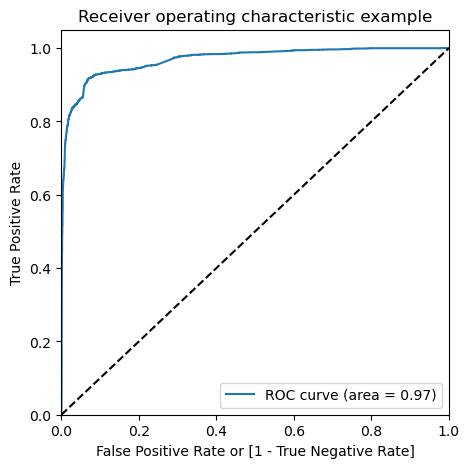

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [156]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.167291,302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.006234,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.220043,1033,0,1,1,1,0,0,0,0,0,0,0
3,0,0.053011,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.996485,3241,1,1,1,1,1,1,1,1,1,1,1


In [157]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.806538  0.974465  0.702922
0.2   0.2  0.907434  0.932043  0.892249
0.3   0.3  0.922521  0.918451  0.925032
0.4   0.4  0.923778  0.905272  0.935197
0.5   0.5  0.917020  0.859143  0.952732
0.6   0.6  0.920006  0.835667  0.972046
0.7   0.7  0.916234  0.812191  0.980432
0.8   0.8  0.908534  0.783773  0.985515
0.9   0.9  0.890146  0.726524  0.991105


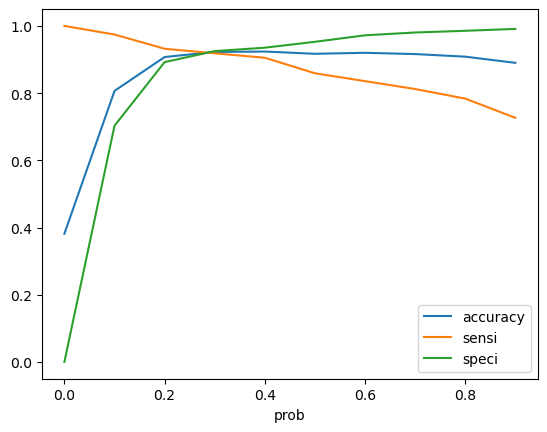

In [160]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability

In [161]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()    

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.167291,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.006234,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.220043,1033,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.053011,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.996485,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [162]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9225208235109226

In [163]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3640,  295],
       [ 198, 2230]], dtype=int64)

In [164]:
# Predicted         not_converted    converted
# Actual
    # not_converted        3640      295
    # converted            198       2230  

In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Accuracy
float(TP+TN)/float(TP+TN+FP+FN)

0.9225208235109226

In [167]:
# sensitivity 
TP / float(TP+FN)

0.9184514003294892

In [168]:
# specificity
TN / float(TN+FP)

0.9250317662007624

In [169]:
# Calculate false postive rate
FP/ float(TN+FP)

0.07496823379923762

In [170]:
# Positive predictive value 
TP / float(TP+FP)

0.8831683168316832

In [171]:
# Negative predictive value
TN / float(TN+ FN)

0.9484106305367379

Observations from Train data
1. ROC curve = 0.97
2. Accuracy = 92.25%
3. Sensitivity = 91.85%
4. Specifity = 92.5%

#### Precision and Recall

In [172]:
# checking Confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3640,  295],
       [ 198, 2230]], dtype=int64)

#### Precision TP / TP + FP

In [173]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8831683168316832

#### Recall TP / TP + FN

In [174]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9184514003294892

In [175]:
# using sklearn utilities
from sklearn.metrics import precision_score, recall_score

#precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8831683168316832

In [176]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9184514003294892

### Precision and recall tradeoff

In [177]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       1
 9       0
 10      1
 11      0
 12      1
 13      0
 14      0
 15      0
 16      0
 17      1
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      1
 26      1
 27      0
 28      1
 29      0
 30      0
 31      1
 32      0
 33      1
 34      0
 35      1
 36      0
 37      1
 38      0
 39      0
 40      0
 41      1
 42      0
 43      0
 44      1
 45      0
 46      1
 47      0
 48      1
 49      0
 50      0
 51      0
 52      1
 53      0
 54      1
 55      0
 56      0
 57      1
 58      0
 59      0
 60      1
 61      0
 62      1
 63      0
 64      1
 65      0
 66      0
 67      1
 68      0
 69      0
 70      0
 71      1
 72      0
 73      0
 74      0
 75      1
 76      1
 77      1
 78      0
 79      0
 80      1
 81      0
 82      0
 83      1
 84      1
 85      0
 86      0
 87      0
 88      0
 89      1
 90      0

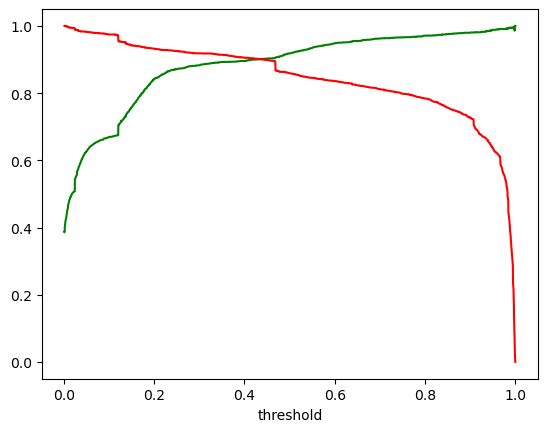

In [179]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# tradeoff plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('threshold')
plt.show()

### Model Evaluation

In [180]:
# scaling of test data
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 
                                                                'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6906,0.292342,1.919395,-0.136014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1873,-0.402381,-0.546142,-0.136014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
771,1.334426,-0.797465,2.548258,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4495,0.292342,-0.623190,0.937695,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
9061,-0.402381,2.392690,-0.136014,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [181]:
# assigning columns with good VIF values
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
6906,1.919395,0,0,0,1,0,0,0,0,0,1,0,0
1873,-0.546142,0,0,0,1,0,1,0,0,0,0,1,0
771,-0.797465,0,0,0,0,0,0,0,0,1,0,0,0
4495,-0.623190,0,0,0,0,0,0,0,0,1,0,0,0
9061,2.392690,0,0,0,0,0,0,1,0,0,0,1,0


In [182]:
# adding constant
X_test_sm = sm.add_constant(X_test)

### Prediction on Test dataset

In [183]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

6906    0.998509
1873    0.025051
771     0.005414
4495    0.006264
9061    0.995912
4929    0.120998
2308    0.041344
1034    0.024475
9033    0.005381
7008    0.912618
dtype: float64

In [184]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6906,0.998509
1873,0.025051
771,0.005414
4495,0.006264
9061,0.995912


In [185]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [186]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [187]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.998509
1,0,1873,0.025051
2,0,771,0.005414
3,0,4495,0.006264
4,1,9061,0.995912


In [188]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,6906,1,0.998509
1,1873,0,0.025051
2,771,0,0.005414
3,4495,0,0.006264
4,9061,1,0.995912


In [189]:
# taking perspective of sensivity-specificity, threshold = 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)  

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,6906,1,0.998509,1
1,1873,0,0.025051,0
2,771,0,0.005414,0
3,4495,0,0.006264,0
4,9061,1,0.995912,1


In [200]:
y_pred_final['Lead Score'] = y_pred_final['Converted_Prob']*100

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead Score
0,6906,1,0.998509,1,99.850899
1,1873,0,0.025051,0,2.505051
2,771,0,0.005414,0,0.541450
3,4495,0,0.006264,0,0.626415
4,9061,1,0.995912,1,99.591198


In [190]:
# overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9292262559589293

In [191]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1556,  104],
       [  89,  978]], dtype=int64)

In [192]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [193]:
# sensitivity 
TP / float(TP+FN)

0.9165885660731021

In [194]:
# specificity
TN / float(TN+FP)

0.9373493975903614

In [195]:
# precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9038817005545287

In [196]:
# recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9165885660731021

Observations from Test data
1. Accuracy = 92.9%
2. Sensitivity = 91.65%
3. Specificity = 93.73%

Observations from Train data

1. Accuracy = 92.25%
2. Sensitivity = 91.85%
3. Specifity = 92.5%

### Conclusion

Top 3 features that contribute to lead conversion are:
    1. Total Time Spent on Website
    2. Leads that have come through source as reference
    3. Leads that have come through source as Welingak Website

Top 3 features that need to be improved are:
    1. Last Notable Activity_Olark Chat Conversation - Olark chat needs to be improved to redirect leads to the sales team
    2. Last Notable Activity_Modified
    3. Tags_Will revert after reading the email - sales team need to follow up on the mail sent to leads to resolve any further queries etc to improve lead conversion